In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
# -------------------------------
# 1. 데이터 불러오기
# -------------------------------
df = pd.read_csv("train.csv")

In [4]:
# 주요 변수 선택
features = ["GrLivArea", "OverallQual", "YearBuilt", "FullBath", "GarageCars"]
X = df[features]
y = df["SalePrice"]

print(X)

      GrLivArea  OverallQual  YearBuilt  FullBath  GarageCars
0          1710            7       2003         2           2
1          1262            6       1976         2           2
2          1786            7       2001         2           2
3          1717            7       1915         1           3
4          2198            8       2000         2           3
...         ...          ...        ...       ...         ...
1455       1647            6       1999         2           2
1456       2073            6       1978         2           2
1457       2340            7       1941         2           1
1458       1078            5       1950         1           1
1459       1256            5       1965         1           1

[1460 rows x 5 columns]


In [5]:
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


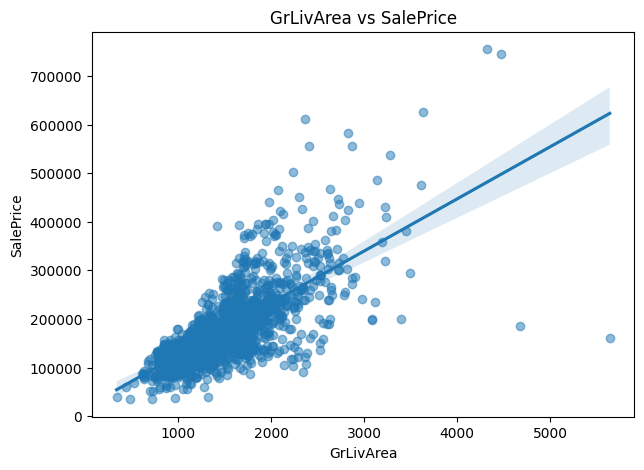

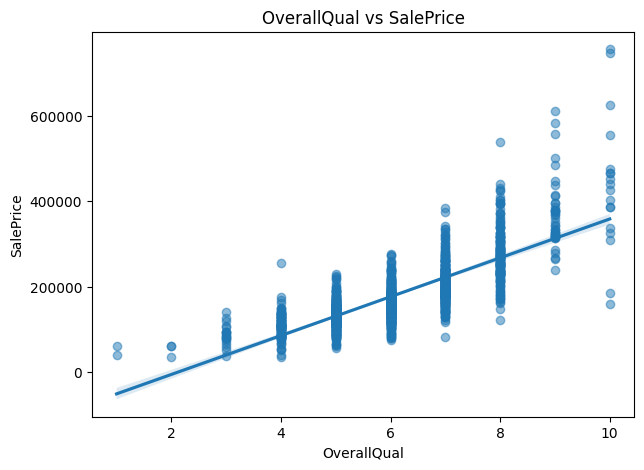

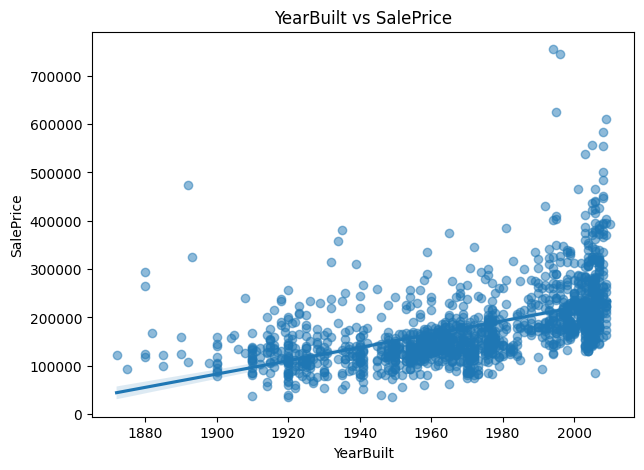

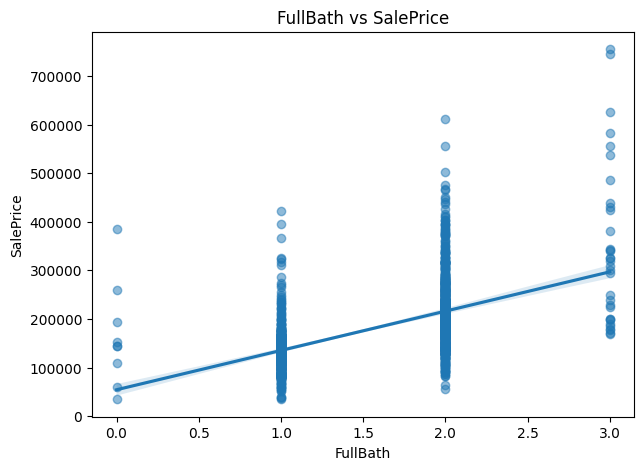

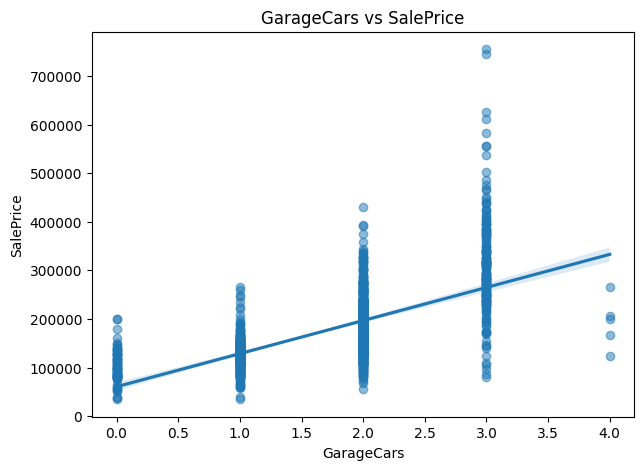

In [6]:
import seaborn as sns

for col in features:
    plt.figure(figsize=(7, 5))
    sns.regplot(data=df, x=col, y="SalePrice", scatter_kws={'alpha':0.5})
    plt.title(f"{col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

In [7]:
# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X_train)

      GrLivArea  OverallQual  YearBuilt  FullBath  GarageCars
254        1314            5       1957         1           1
1066       1571            6       1993         2           2
638         796            5       1910         1           0
799        1768            5       1937         1           1
380        1691            5       1924         2           1
...         ...          ...        ...       ...         ...
1095       1314            6       2006         2           2
1130       1981            4       1928         2           2
1294        864            5       1955         1           2
860        1426            7       1918         1           1
1126       1555            7       2007         2           3

[1168 rows x 5 columns]


In [9]:
# -------------------------------
# 2. 단순 선형회귀 모델
# -------------------------------
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [10]:
# 성능 평가
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [13]:
print("[단순 선형회귀 성능]")
print(f"R²: {r2_linear:.4f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"MSE: {mse_linear:.2f}")
print(f"MAE: {mae_linear:.2f}")

[단순 선형회귀 성능]
R²: 0.7663
RMSE: 42340.94
MSE: 1792755231.84
MAE: 27576.24


In [14]:
coefficients_linear = linear_model.coef_
print(coefficients_linear)

[   58.76813322 22457.47914767   429.48355085 -8939.50839926
 16871.64009513]


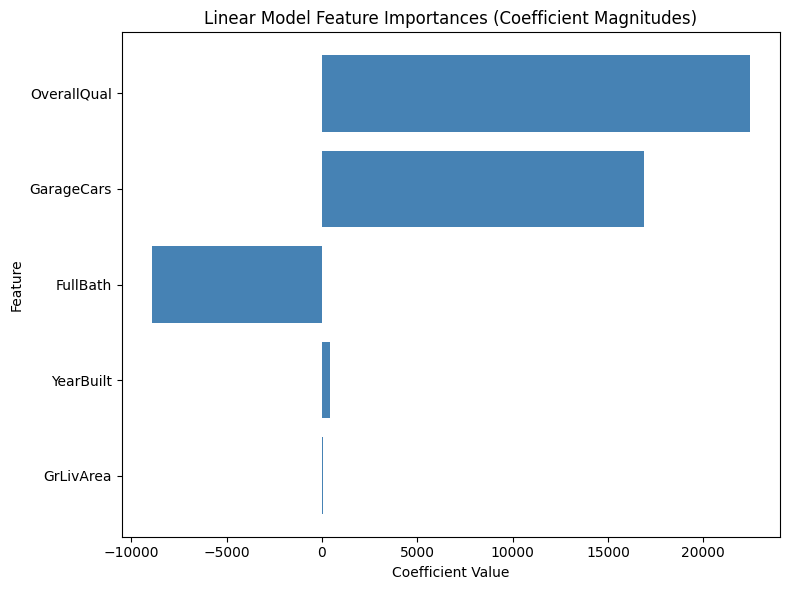

In [15]:
# DataFrame으로 정리
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients_linear
})

# 절댓값 기준으로 정렬
coef_df = coef_df.reindex(coef_df["Coefficient"].abs().sort_values(ascending=False).index)

# 시각화
plt.figure(figsize=(8,6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color='steelblue')
plt.gca().invert_yaxis()  # 큰 값이 위로 오게
plt.title("Linear Model Feature Importances (Coefficient Magnitudes)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [16]:
# -------------------------------
# 3. 다항 회귀 모델 (2차항 + 상호작용 포함)
# -------------------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [17]:
print(X_train_poly)

[[1.314e+03 5.000e+00 1.957e+03 ... 1.000e+00 1.000e+00 1.000e+00]
 [1.571e+03 6.000e+00 1.993e+03 ... 4.000e+00 4.000e+00 4.000e+00]
 [7.960e+02 5.000e+00 1.910e+03 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [8.640e+02 5.000e+00 1.955e+03 ... 1.000e+00 2.000e+00 4.000e+00]
 [1.426e+03 7.000e+00 1.918e+03 ... 1.000e+00 1.000e+00 1.000e+00]
 [1.555e+03 7.000e+00 2.007e+03 ... 4.000e+00 6.000e+00 9.000e+00]]


In [18]:
# 스케일링 (다항항은 크기 차이가 크므로 표준화 추천)
scaler = StandardScaler() #z스코어 정규화
#중요
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [19]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [20]:
# 성능 평가
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [21]:
print("\n [다항 회귀 성능]")
print(f"R²: {r2_poly:.4f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"MSE: {mse_poly:.2f}")
print(f"MAE: {mae_poly:.2f}")


 [다항 회귀 성능]
R²: 0.8356
RMSE: 35505.86
MSE: 1260666126.19
MAE: 23664.80


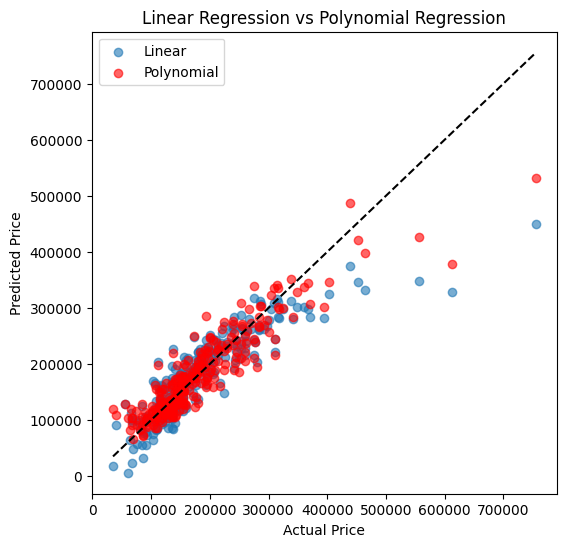

In [22]:
# -------------------------------
# 5. 실제값 vs 예측값 시각화
# -------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Linear")
plt.scatter(y_test, y_pred_poly, alpha=0.6, label="Polynomial", color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression vs Polynomial Regression")
plt.legend()
plt.show()


In [23]:
coefficients = poly_model.coef_
print(coefficients)

[ 423128.08277853 -334870.25503706  553122.12684333 -132854.70838568
 -280750.75890214  -81052.38816617   89138.88126242 -434642.83784006
   62762.87526573   33820.96233962   16599.80132954  324959.06269031
  -24685.24014268   27838.30998268 -556999.57683465  119651.31842661
  280450.53900422    8259.8375535   -25729.37905772   -5867.20071186]


In [24]:
# 다항 특징 이름
feature_names = poly.get_feature_names_out(features)
print(feature_names)

['GrLivArea' 'OverallQual' 'YearBuilt' 'FullBath' 'GarageCars'
 'GrLivArea^2' 'GrLivArea OverallQual' 'GrLivArea YearBuilt'
 'GrLivArea FullBath' 'GrLivArea GarageCars' 'OverallQual^2'
 'OverallQual YearBuilt' 'OverallQual FullBath' 'OverallQual GarageCars'
 'YearBuilt^2' 'YearBuilt FullBath' 'YearBuilt GarageCars' 'FullBath^2'
 'FullBath GarageCars' 'GarageCars^2']


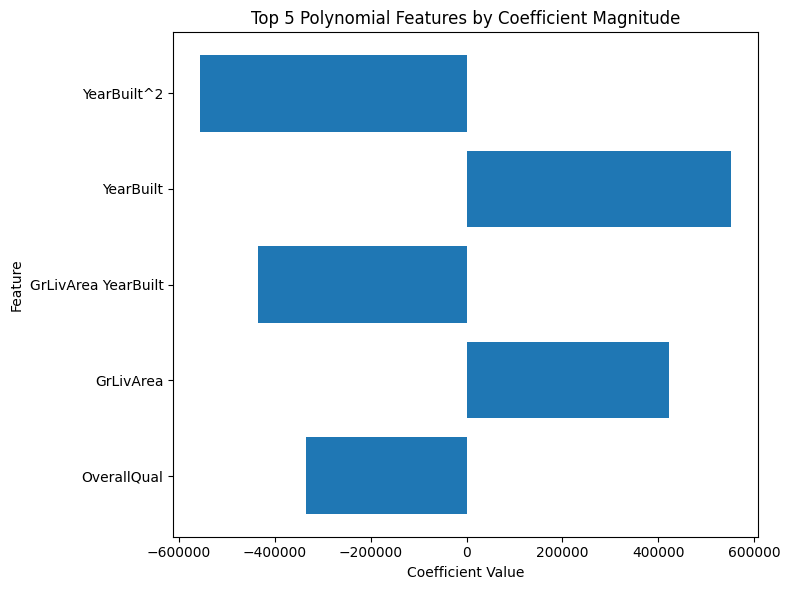

In [25]:
# 데이터프레임으로 정리
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# 절댓값 기준 정렬
coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

top_n = 5
plt.figure(figsize=(8, 6))
plt.barh(coef_df_sorted['Feature'][:top_n], coef_df_sorted['Coefficient'][:top_n])
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} Polynomial Features by Coefficient Magnitude")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [26]:
from sklearn.linear_model import Ridge, Lasso

In [27]:
# -------------------------------
# L1 (Lasso) 정규화
# -------------------------------
lasso = Lasso(random_state=42)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("[L1 정규화 (Lasso) 성능]")
print(f"R²: {r2_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"MSE: {mse_lasso:.2f}")

[L1 정규화 (Lasso) 성능]
R²: 0.8311
RMSE: 35992.45
MSE: 1295456194.55


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.936e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [28]:
# -------------------------------
# L2 (Ridge) 정규화
# -------------------------------
ridge = Ridge(alpha=1, random_state=42)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n[L2 정규화 (Ridge) 성능]")
print(f"R²: {r2_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")


[L2 정규화 (Ridge) 성능]
R²: 0.8299
RMSE: 36122.31
MSE: 1304821058.94
